## Stock Prediction

### About Dataset

#### Description:
The dataset contains historical stock data for Apple Inc. (AAPL) obtained from Yahoo Finance. It spans from January 1, 2000, to April 12, 2024. The data includes various attributes such as Open, High, Low, Close, and Volume.

#### Features:
- Date: The date of the trading day.
- Open: The opening price of the stock on the trading day.
- High: The highest price of the stock on the trading day.
- Low: The lowest price of the stock on the trading day.
- Close: The closing price of the stock on the trading day.
- Volume: The volume of stock traded on the trading day.

#### Time Period:
The dataset covers a time period of approximately 24 years, providing a significant amount of historical data for analysis and modeling.

#### Data Source:
The data is sourced from Yahoo Finance using the `yfinance` library in Python. It provides reliable and comprehensive historical stock data for analysis and modeling purposes.

#### Purpose:
The dataset is utilized for the development and evaluation of machine learning models for stock price prediction. By analyzing historical patterns and trends in the stock data, the models aim to forecast future stock prices to assist investors and traders in making informed decisions.

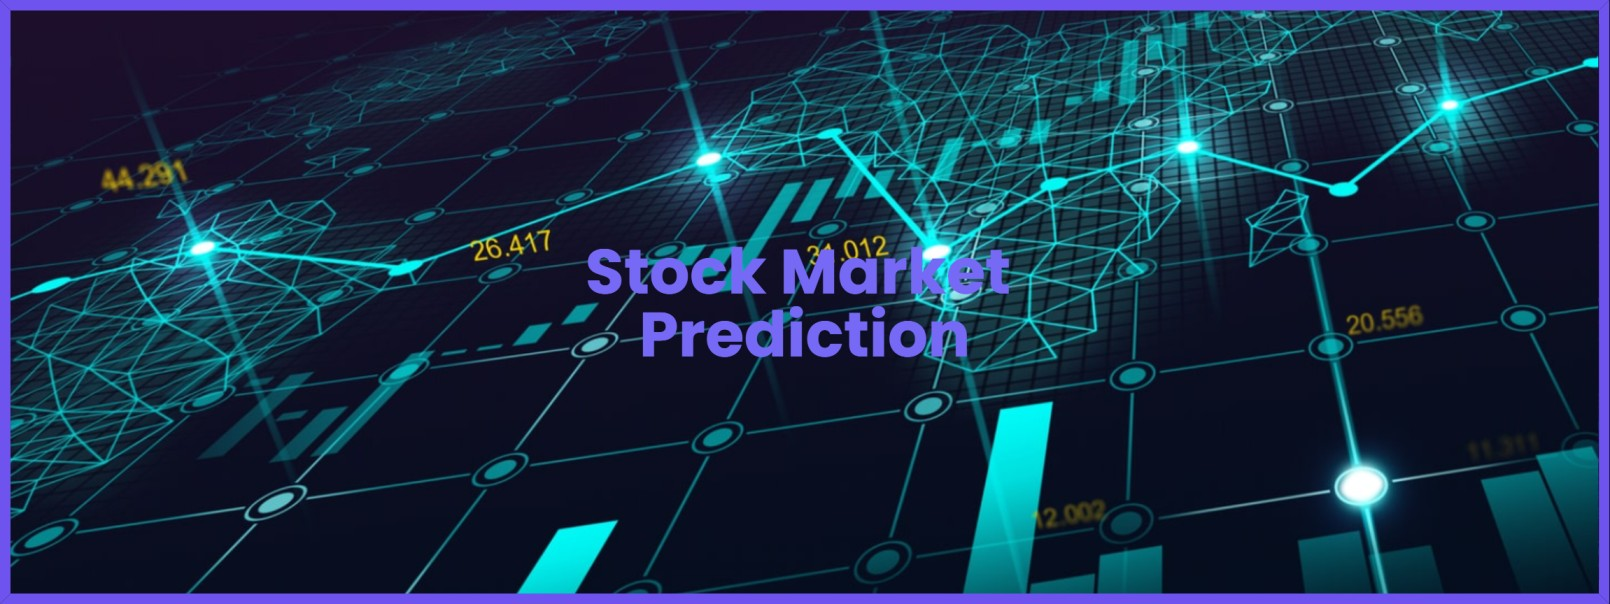


### EDA (Exploratory Data Analysis)

#### Data Loading and Initial Exploration:
Let's begin by loading the dataset and performing initial exploration to understand its structure and characteristics.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

In [3]:
import yfinance as yf

start = '2000-01-01'
end = '2024-04-12'
df = yf.download('AAPL', start=start, end=end)
print(df.head())


[*********************100%%**********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2000-01-03  0.936384  1.004464  0.907924  0.999442   0.846127  535796800
2000-01-04  0.966518  0.987723  0.903460  0.915179   0.774790  512377600
2000-01-05  0.926339  0.987165  0.919643  0.928571   0.786128  778321600
2000-01-06  0.947545  0.955357  0.848214  0.848214   0.718098  767972800
2000-01-07  0.861607  0.901786  0.852679  0.888393   0.752113  460734400


/opt/homebrew/Caskroom/miniforge/base/envs/python/lib/python3.11/site-packages/yfinance/utils.py:782: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-05,169.589996,170.389999,168.949997,169.580002,169.580002,42055200
2024-04-08,169.029999,169.199997,168.240005,168.449997,168.449997,37425500
2024-04-09,168.699997,170.080002,168.350006,169.669998,169.669998,42451200
2024-04-10,168.800003,169.089996,167.110001,167.779999,167.779999,49709300
2024-04-11,168.339996,175.460007,168.160004,175.039993,175.039993,91070300


In [5]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.846127,535796800
1,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.774790,512377600
2,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.786128,778321600
3,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.718098,767972800
4,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.752113,460734400


In [6]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,0.936384,1.004464,0.907924,0.999442,535796800
1,0.966518,0.987723,0.903460,0.915179,512377600
2,0.926339,0.987165,0.919643,0.928571,778321600
3,0.947545,0.955357,0.848214,0.848214,767972800
4,0.861607,0.901786,0.852679,0.888393,460734400


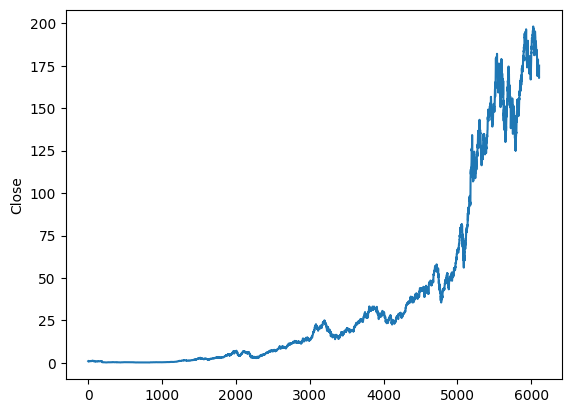

In [7]:
sns.lineplot(data=df['Close'])
plt.show()

In [8]:
ma100 = df['Close'].rolling(window=100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
6102    184.7367
6103    184.5572
6104    184.4059
6105    184.2093
6106    184.0796
Name: Close, Length: 6107, dtype: float64

In [9]:
ma200 = df['Close'].rolling(window=200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
6102    183.13955
6103    183.06200
6104    182.97535
6105    182.88085
6106    182.82970
Name: Close, Length: 6107, dtype: float64

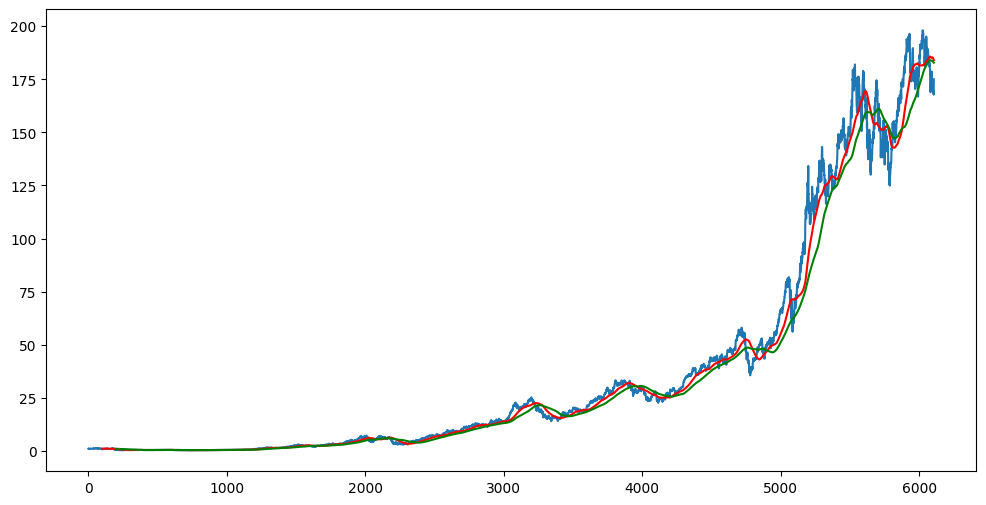

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [11]:
df.shape

(6107, 5)

## Data Visualization:


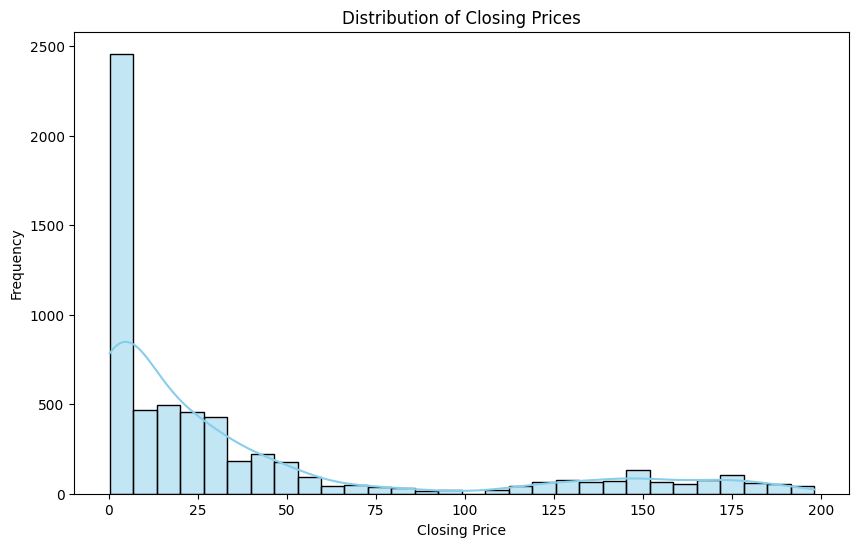

In [12]:
#Plotting closing prices distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

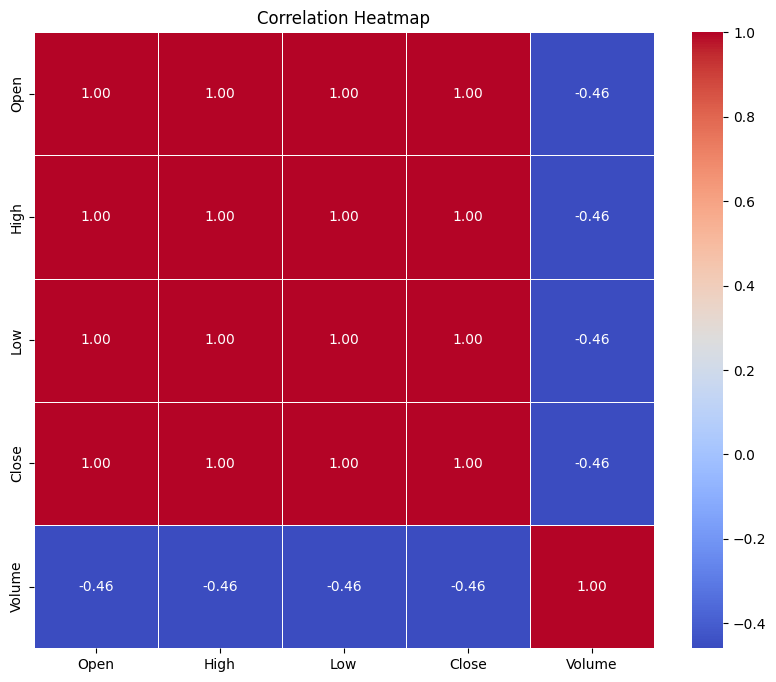

In [13]:
# Visualizing correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

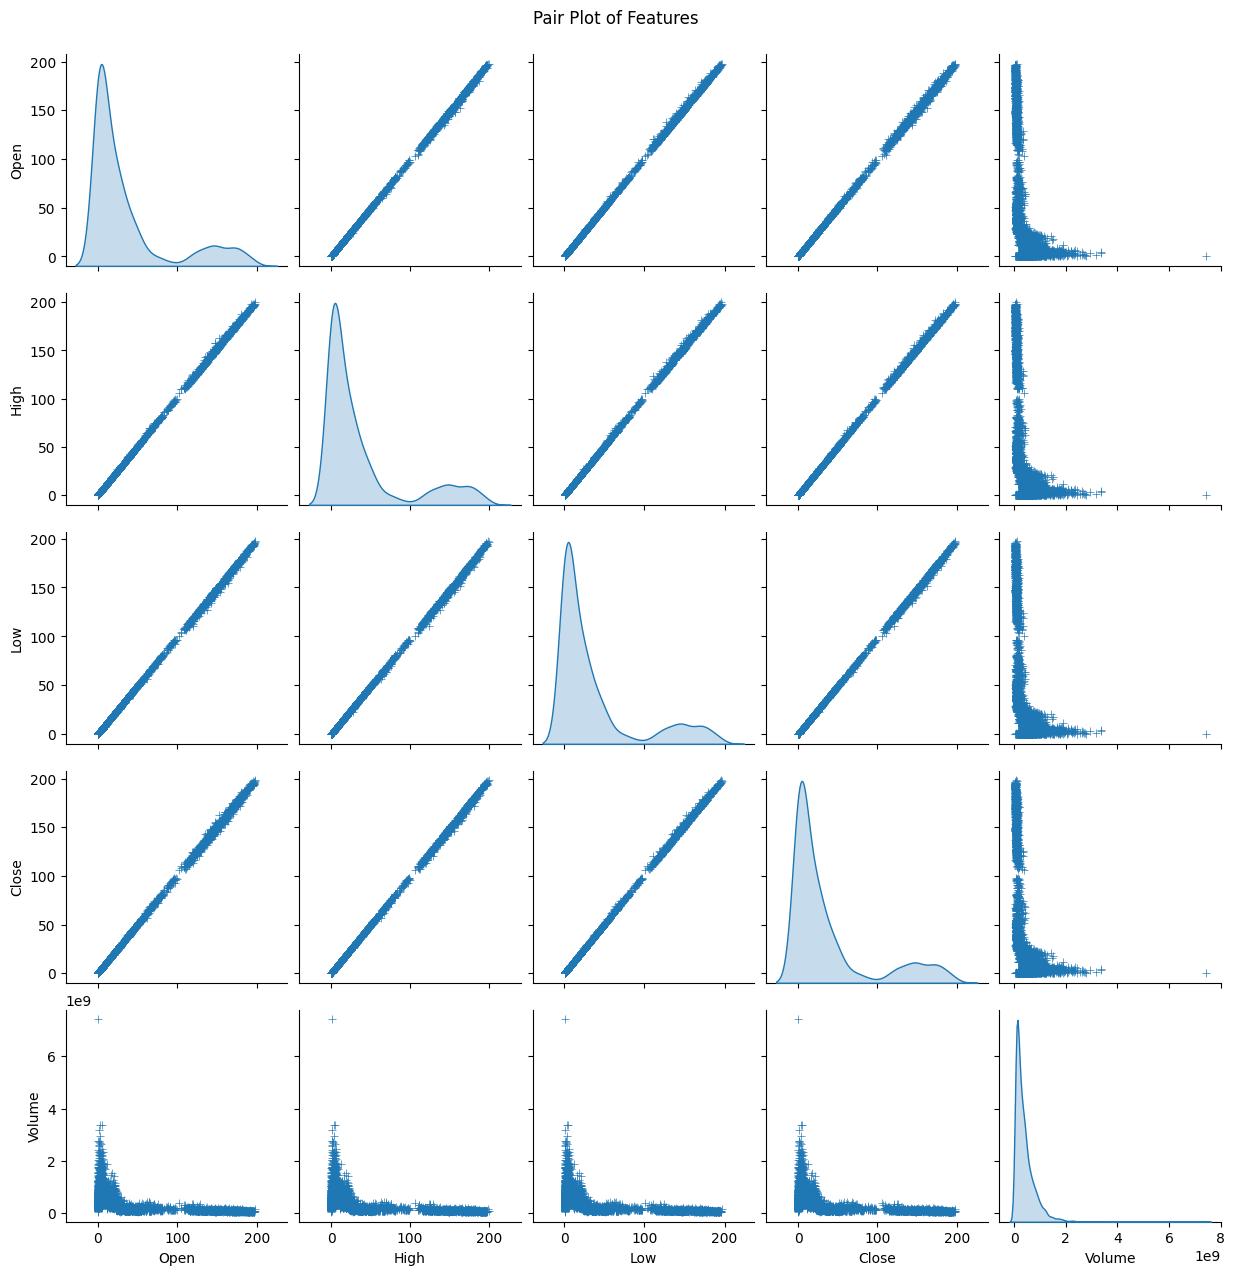

In [14]:
# Pair plot for a comprehensive overview
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Volume']], diag_kind='kde', markers='+')
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

### Splitting Data into Training and Testing

In [15]:
data_training = pd.DataFrame(df['Close'][0:int(len(df) * 0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df) * 0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(4274, 1)
(1833, 1)


In [16]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02317551],
       [0.0206233 ],
       [0.02102893],
       ...,
       [0.87346935],
       [0.87521091],
       [0.88081435]])

In [17]:
X_train = []
Y_train = []

for i in range(100, data_training_array.shape[0]):
    X_train.append(data_training_array[i-100:i])
    Y_train.append(data_training_array[i, 0])

X_train, Y_train = np.array(X_train), np.array(Y_train)



### Machine Learing Models

In [18]:
#### Linear Regression Model

from sklearn.linear_model import LinearRegression

In [19]:
# Initialize the model
lr_model = LinearRegression()

In [20]:
# Reshape X_train for Linear Regression
X_train_lr = X_train.reshape(X_train.shape[0], X_train.shape[1])

# Fit the Linear Regression model to the training data
lr_model.fit(X_train_lr, Y_train)


LinearRegression()

In [21]:
# Reshape X_train for prediction
X_train_lr = X_train.reshape(X_train.shape[0], X_train.shape[1])

# Predictions on training data
lr_train_predictions = lr_model.predict(X_train_lr)


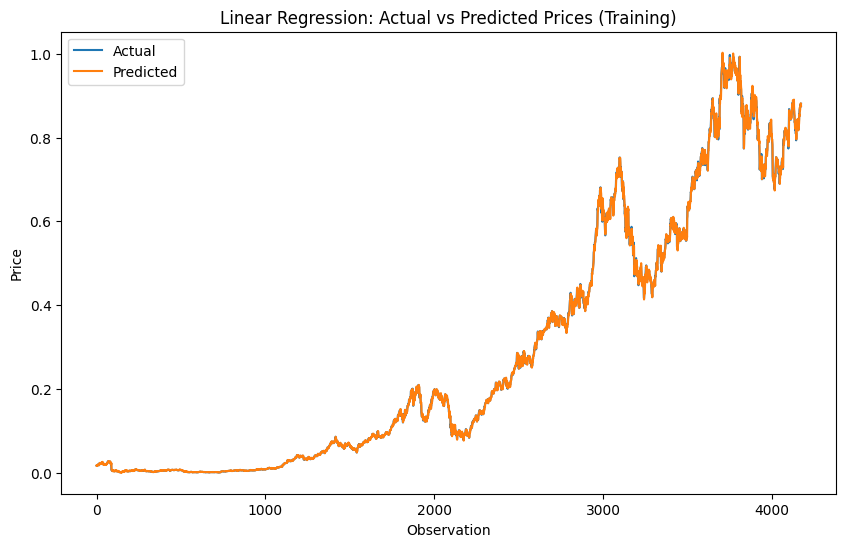

In [22]:
# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(Y_train, label='Actual')
plt.plot(lr_train_predictions, label='Predicted')
plt.title('Linear Regression: Actual vs Predicted Prices (Training)')
plt.xlabel('Observation')
plt.ylabel('Price')
plt.legend()
plt.show()


In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluation metrics for Linear Regression
lr_metrics = {
    'Mean Squared Error (MSE)': mean_squared_error(Y_train, lr_train_predictions),
    'Mean Absolute Error (MAE)': mean_absolute_error(Y_train, lr_train_predictions),
    'R-squared (R2)': r2_score(Y_train, lr_train_predictions)
}



In [24]:
# Assuming lr_metrics is a dictionary containing evaluation metrics for Linear Regression

print("Evaluation Metrics for Linear Regression:")
for metric, value in lr_metrics.items():
    print(f"{metric}: {value}")



Evaluation Metrics for Linear Regression:
Mean Squared Error (MSE): 4.3581064546002794e-05
Mean Absolute Error (MAE): 0.0037108395335143027
R-squared (R2): 0.9995224124415673


#### Random Forest Regression Model


In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [27]:
# Reshape X_train for Random Forest Regression
X_train_rf = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])

# Fit the Random Forest Regression model to the training data
rf_model.fit(X_train_rf, Y_train)



RandomForestRegressor(random_state=42)

In [28]:
# Reshape X_train for prediction with Random Forest Regression
X_train_rf = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])

# Predictions on training data
rf_train_predictions = rf_model.predict(X_train_rf)


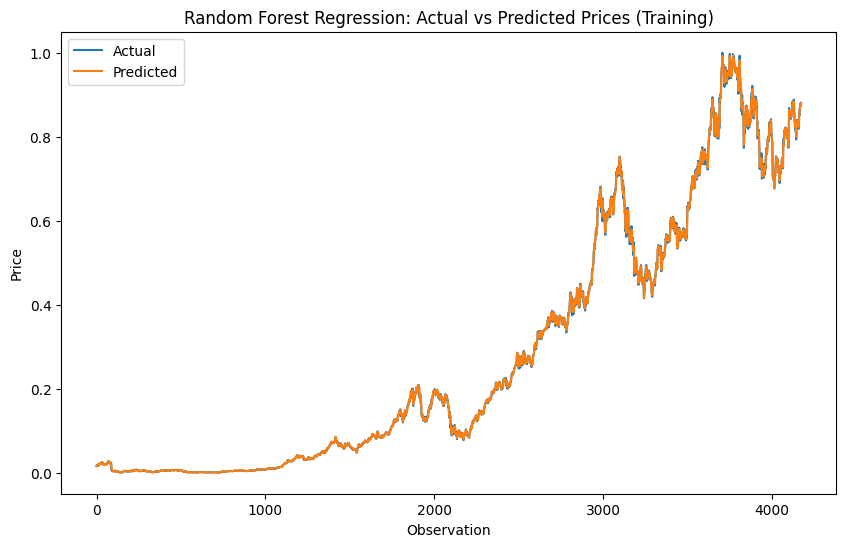

In [29]:
# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(Y_train, label='Actual')
plt.plot(rf_train_predictions, label='Predicted')
plt.title('Random Forest Regression: Actual vs Predicted Prices (Training)')
plt.xlabel('Observation')
plt.ylabel('Price')
plt.legend()
plt.show()

In [30]:
# Evaluation metrics for Random Forest Regression
rf_metrics = {
    'Mean Squared Error (MSE)': mean_squared_error(Y_train, rf_train_predictions),
    'Mean Absolute Error (MAE)': mean_absolute_error(Y_train, rf_train_predictions),
    'R-squared (R2)': r2_score(Y_train, rf_train_predictions)
}

In [36]:
# Printing evaluation metrics for Random Forest Regression
for metric, value in rf_metrics.items():
    print(f"{metric}: {value}")


KeyError: 'accuracy'

### Shifting to LSTM
After trying Linear Regression and Random Forest Regression, we find that these models have limitations in capturing the complex patterns and dependencies present in the stock price data. These traditional machine learning models struggle with capturing time-series dynamics, nonlinear relationships, and long-term dependencies.

LSTM (Long Short-Term Memory) networks are well-suited for sequential data like time series because they can capture long-term dependencies and handle time lags effectively. Additionally, LSTMs have memory cells that can remember information over long periods, making them ideal for modeling temporal data like stock prices.

In [32]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Enable Metal acceleration
os.environ['TF_METAL_ENABLED'] = '1'


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping


In [34]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, Y_train, epochs=20, batch_size=32, verbose=1)

2024-04-19 06:21:21.960754: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-04-19 06:21:21.960784: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-04-19 06:21:21.960790: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-04-19 06:21:21.961366: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-19 06:21:21.961529: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/20


2024-04-19 06:21:24.127417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


KeyboardInterrupt: 

In [ ]:
# Define the path for saving the model
model_path = '/content/Models/StockAI.h5'

# Save the model
model.save(model_path)

print("Model saved successfully at:", model_path)



Model saved successfully at: /content/Models/StockAI.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
data_testing.head()

,Close
4274,29.190001
4275,29.182501
4276,28.955000
4277,29.037500
4278,29.004999


In [ ]:
# Create a DataFrame containing the last 100 days of training data
past_100_days_df = data_training.tail(100)

# Append the testing data to the DataFrame containing the last 100 days of training data
import pandas as pd
final_df = pd.concat([past_100_days_df, data_testing], ignore_index=True)



In [ ]:
final_df.head()

,Close
0,26.870001
1,27.092501
2,27.202499
3,27.000000
4,26.982500


In [ ]:
# Scale the input data using the scaler fitted on the training data
input_data = scaler.fit_transform(final_af)

# Display the scaled input data
input_data


array([[0.00631067],
       [0.00760181],
       [0.00824012],
       ...,
       [0.83496539],
       [0.8239979 ],
       [0.86612696]])

In [ ]:
input_data.shape

(1933, 1)

In [ ]:
X_test = []
y_test = []

# Iterate through the input_data to create X_test and y_test
for i in range(100, input_data.shape[0]):
    X_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])  # Assuming the target variable is in the first column

# Convert lists to arrays
X_test, y_test = np.array(X_test), np.array(y_test)

# Print the shapes of X_test and y_test
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_test shape: (1833, 100, 1)
y_test shape: (1833,)


In [ ]:
# Making Predictions
y_predicted = model.predict(X_test)

# Print the shape of y_predicted
print("y_predicted shape:", y_predicted.shape)


58/58 [==============================] - 4s 65ms/step
y_predicted shape: (1833, 1)
58/58 [==============================] - 4s 62ms/step
y_predicted shape: (1833, 1)


In [ ]:
y_test

array([0.0197734 , 0.01972988, 0.01840972, ..., 0.83496539, 0.8239979 ,
       0.86612696])

In [ ]:
scaler.scale_

array([0.0058029])

In [ ]:
# Define the scale factor
scale_factor = 1 / 0.0058029

# Scale the predicted values
y_predicted_scaled = y_predicted * scale_factor

# Scale the test values
y_test_scaled = y_test * scale_factor


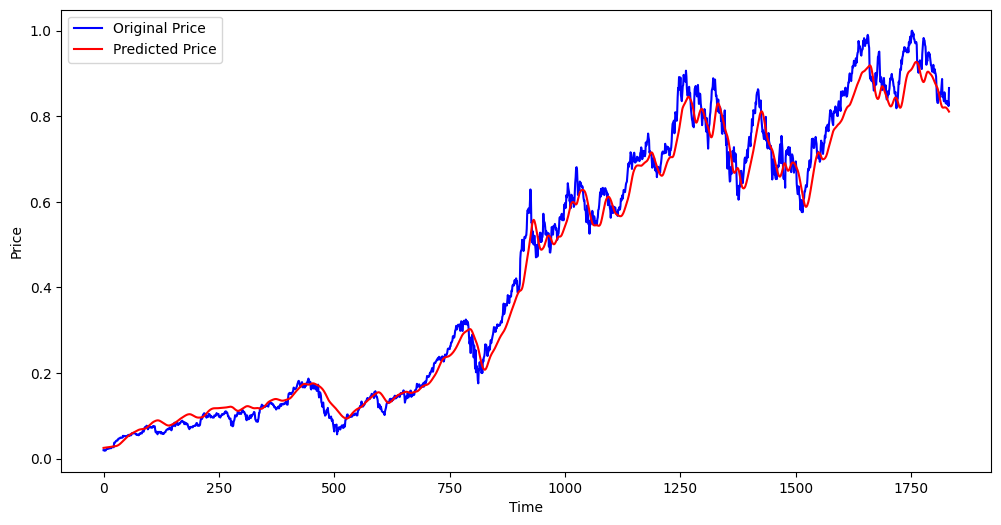

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
